In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')

In [3]:
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [5]:
df3['start_ts']=pd.to_datetime(df3['start_ts'])

Now all the columns have right date types.

**identify the top 10 neighborhoods in terms of drop-offs**

In [6]:
df1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


**make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs**

In [7]:
df2=df2[df2['average_trips']>1259]

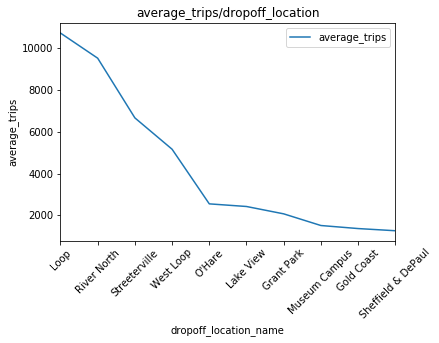

In [8]:
df2.plot(x='dropoff_location_name',y='average_trips',rot=45);
plt.ylabel('average_trips');
plt.title('average_trips/dropoff_location');

In [9]:
df1 = df1[df1['trips_amount']>5952]

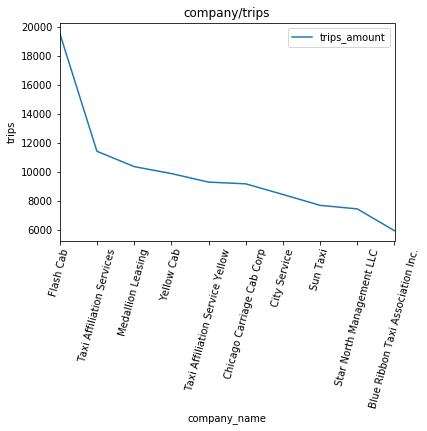

In [10]:
df1.plot(x='company_name',y='trips_amount',rot=75);
plt.title('company/trips');
plt.ylabel('trips');

I can conclude that in terms of dropoff locations Loop region is the leader, then the average number of dropoffs starts to gradualy drop untill it reaches the ohare, and then the curve flattens a bit. this means that all the locations after ohaire inclusive are not very popular drop off locations. in terms of taxi companies I can see that Flash Cab is leading by a mile, then however the curve flattens and all of the other companies roughly are equally popular.

**"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

To test this hypothesis I will use the ttest and my null hypothesys will be that the average duration of rides from the loop to O'hare international airport is the same on the rainy days as on the any other days.

In [12]:
df = df3.groupby('weather_conditions',as_index=False).agg({'duration_seconds':['var']})

In [13]:
df

,weather_conditions,duration_seconds
,,var
0,Bad,520294.086002
1,Good,576382.009690


Here I can see that the variances are different, this will be needed for the t-test

In [14]:
x = df3[df3['weather_conditions']=='Bad']['duration_seconds']
y = df3[df3['weather_conditions']=='Good']['duration_seconds']

In [15]:
stats.ttest_ind(x,y,equal_var = False)

Ttest_indResult(statistic=7.186034288068629, pvalue=6.738994326108734e-12)

P_value for the test is 6.738994326108734e-12 which is a really small number so that means that I can reject the null hypothesis and so the hypothesis that The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. is true